In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import random
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
# Download the movie_reviews dataset if not already downloaded
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Load the movie_reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [11]:
# Shuffle the documents to mix positive and negative reviews
random.shuffle(documents)

In [12]:
# Define a custom function to extract features from the text data
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [13]:
# Extract words and filter out stopwords
all_words = [word.lower() for word in movie_reviews.words()]
filtered_words = [word for word in all_words if word not in stopwords.words('english')]

In [14]:
# Get the most common words as features
word_features = nltk.FreqDist(filtered_words).most_common(2000)
word_features = [word for word, _ in word_features]

In [15]:
# Create feature sets
featuresets = [(document_features(doc, word_features), category) for (doc, category) in documents]

In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
split_ratio = int(len(featuresets) * 0.8)
training_set, testing_set = featuresets[:split_ratio], featuresets[split_ratio:]

In [28]:
# Calculate class weights to handle class imbalance
neg_count = sum(1 for _, category in training_set if category == 'neg')
pos_count = len(training_set) - neg_count
class_weights = {'neg': 1 / neg_count, 'pos': 1 / pos_count}

In [29]:
# Train a Random Forest classifier with class weights
classifier = RandomForestClassifier(n_estimators=100, class_weight=class_weights)

In [30]:
# Extract features and labels
train_features = [list(feat.values()) for feat, category in training_set]
train_labels = [category for _, category in training_set]

In [31]:
# Fit the classifier
classifier.fit(train_features, train_labels)

RandomForestClassifier(class_weight={'neg': 0.0012531328320802004,
                                     'pos': 0.0012468827930174563})

In [32]:
# Test the classifier
test_features = [list(feat.values()) for feat, category in testing_set]
predictions = classifier.predict(test_features)
true_labels = [category for _, category in testing_set]

In [33]:
# Evaluate the classifier
accuracy = accuracy_score(true_labels, predictions)
classification_report_str = classification_report(true_labels, predictions)
confusion = confusion_matrix(true_labels, predictions)

In [34]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

         neg       0.83      0.82      0.82       202
         pos       0.82      0.83      0.82       198

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.82      0.82       400

Confusion Matrix:
[[165  37]
 [ 33 165]]


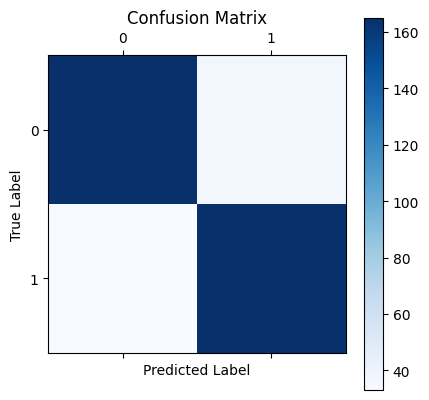

In [35]:
# Plot confusion matrix
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
# Predict sentiment on user input
user_input = input("Enter a movie review: ")
user_input = user_input.lower()
user_input_words = word_tokenize(user_input)
user_input_features = document_features(user_input_words, word_features)
user_input_features_list = list(user_input_features.values())
sentiment = classifier.predict([user_input_features_list])
if sentiment[0] == 'pos':
    print("Predicted sentiment: Positive")
else:
    print("Predicted sentiment: Negative")

Enter a movie review: you are awesome
Predicted sentiment: Negative
